# 막대 그래프 bar chart

막대 그래프(-graph), 바 차트(bar chart), 바 그래프(bar graph)는 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프를 말한다. 막대는 수직으로나 수평으로 그릴 수 있다. 

수량의 크고 작음을 막대의 길이로 표현하기 때문에 내용을 이해하기 쉽다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = pd.read_csv("./data/tips.csv", 
                   dtype={'sex':'category','smoker':'category','day':'category', 'time':'category'})
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


In [3]:
tips.day = tips.day.cat.set_categories(['Thur','Fri','Sat','Sun'])
tips.time = tips.time.cat.set_categories(['Lunch','Dinner'])

## Matplotlib 막대 그래프 그리기

In [4]:
import numpy as np

tips_sum_by_day = tips.groupby('day').tip.sum().sort_values()  # 막대그래프를 크기 순서로 정렬
tips_sum_by_day

day
Fri      51.96
Thur    171.83
Sun     247.39
Sat     260.40
Name: tip, dtype: float64

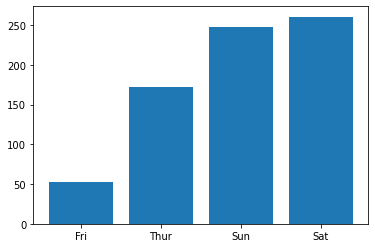

In [5]:
label = tips_sum_by_day.index
index = np.arange(len(label))

plt.bar(label, tips_sum_by_day)

plt.show()

**옆으로 누운 막대그래프는 plt.barh() 함수를 사용**

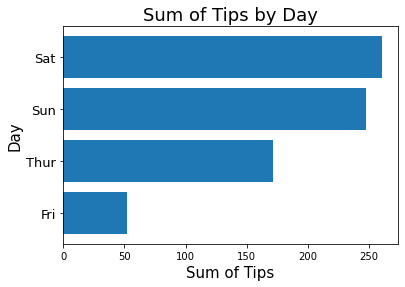

In [6]:
plt.barh(index, tips_sum_by_day)
plt.title('Sum of Tips by Day', fontsize=18)
plt.ylabel('Day', fontsize=15)
plt.xlabel('Sum of Tips', fontsize=15)
plt.yticks(index, label, fontsize=13, rotation=0)
plt.show()

### 그룹으로 나누어 비교하는 막대그래프
성별(sex)에 따라 요일별 tip의 평균을 비교한다.

In [7]:
tips_mean_by_day_male = tips[tips['sex'] == 'Male'].groupby('day').tip.mean()
tips_mean_by_day_female = tips[tips['sex'] == 'Female'].groupby('day').tip.mean()

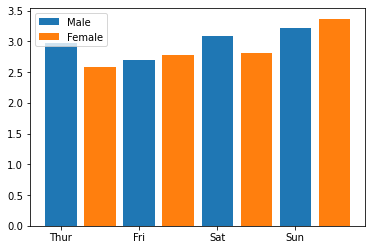

In [8]:
label = tips_mean_by_day_male.index
index = np.arange(len(label))

plt.bar(index, tips_mean_by_day_male, width=0.4, label='Male')
plt.bar(index+0.5, tips_mean_by_day_female, width=0.4, label='Female')

plt.xticks(index, label)
plt.legend()
plt.show()

### 누적막대그래프로 표시하기

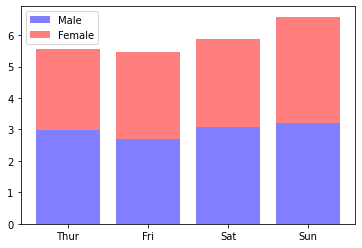

In [9]:
# summary by group

p1 = plt.bar(index, tips_mean_by_day_male, color='b', alpha=0.5, label='Male')
p2 = plt.bar(index, tips_mean_by_day_female, color='r', alpha=0.5,
             bottom=tips_mean_by_day_male, label='Female')

plt.xticks(index, label)
plt.legend()
plt.show()

### pandas - 누적 막대 그래프

In [10]:
df = pd.pivot_table(tips, 
                    index="time", 
                    columns="day", 
                    values="tip", 
                    aggfunc="sum")
df

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,168.83,16.68,0.0,0.00
Dinner,3.00,35.28,260.4,247.39


<AxesSubplot:xlabel='time'>

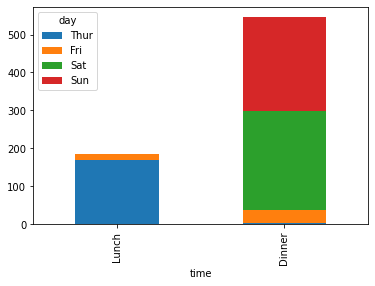

In [11]:
df.plot.bar(stacked=True)

## seaborn 으로 막대 그래프 그리기

### sns.countplot
각 카테고리 값별로 데이터의 개수(count)를 표시할 수 있다.


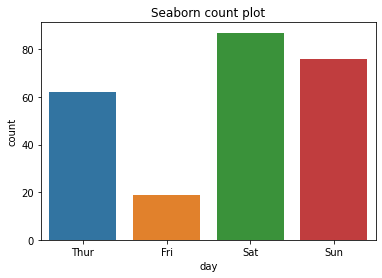

In [12]:
# 요일별 데이터 빈도
sns.countplot(x = 'day', data=tips)
plt.title('Seaborn count plot')
plt.show()

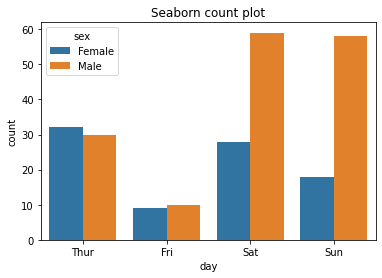

In [13]:
# 요일별 성별 데이터 빈도
sns.countplot(x = 'day', hue='sex', data=tips)
plt.title('Seaborn count plot')
plt.show()

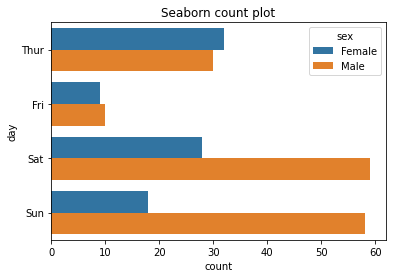

In [14]:
# 요일별 성별 데이터 빈도 - 수평막대그래프
sns.countplot(y = 'day', hue='sex', data=tips)
plt.title('Seaborn count plot')
plt.show()

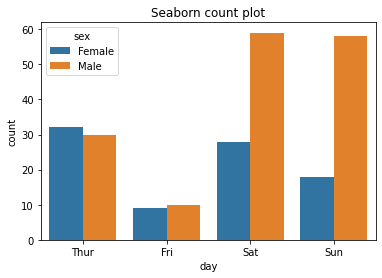

In [15]:
# 요일별 성별 데이터 빈도 - 정렬 순서
sns.countplot(x = 'day', hue='sex', data=tips, order=['Thur', 'Fri','Sat','Sun'])
plt.title('Seaborn count plot')
plt.show()

### sns.barplot
 카테고리 값에 따른 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.
* estimator : y축에 표시할 통계량을 지정, 기본 평균(mean)
* ci : 신뢰구간의 신뢰수준을 지정, 기본 95

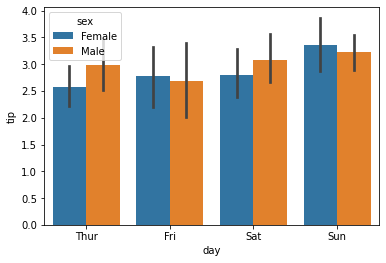

In [16]:
# 요일별 성별에 따른 total bill의 평균을 막대 그래프로
sns.barplot(x="day", y="tip", hue="sex", data=tips, order=['Thur', 'Fri','Sat','Sun'])
plt.show()

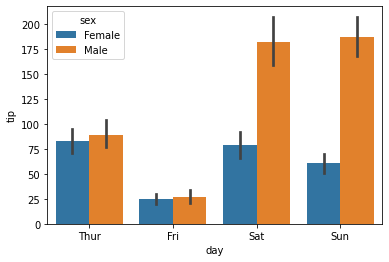

In [17]:
sns.barplot(x="day", y="tip", hue="sex", data=tips, estimator=sum)
plt.show()

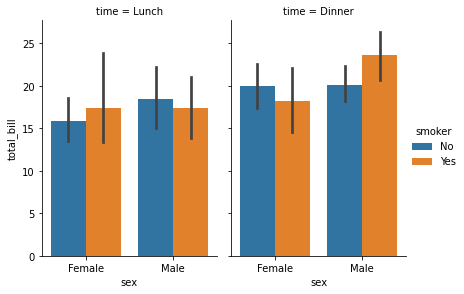

In [18]:
g = sns.catplot(x="sex", y="total_bill",
hue="smoker", col="time",
data=tips, kind="bar",
height=4, aspect=.7)

### pointolot

pointplot는 산점도 점의 위치에 따른 숫자 변수의 중심 경향(기본 mean) 추정치를 나타내며 오차 막대를 사용하여 해당 추정치 주변의 불확실성을 나타낸다.

- pointolot는 하나 이상의 범주형 변수의 서로 다른 수준 간의 비교에 초점을 맞추는 데 막대 도표보다 더 유용할 수 있다.  
- 한 범주형 변수의 수준 간의 관계가 두 번째 범주형 변수의 수준에 따라 어떻게 변하는지 파악할 수 있다.
- 동일한 색조 수준에서 각 점을 연결하는 선을 사용하면 기울기의 차이로 상호 작용을 판단할 수 있으므로 여러 점 또는 막대 그룹의 높이를 비교하는 것보다 차이를 비교하기 쉽다.
- 평균(또는 기타 추정량) 값만 표시하면서 많은 경우 범주형 변수의 각 수준에서 값의 분포를 표시하는 것이 더 유익할 수 있다.

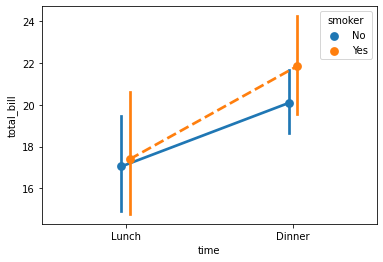

In [19]:
ax = sns.pointplot(x="time", y="total_bill", hue="smoker",
                   data=tips,
                   linestyles=["-", "--"], dodge=True)

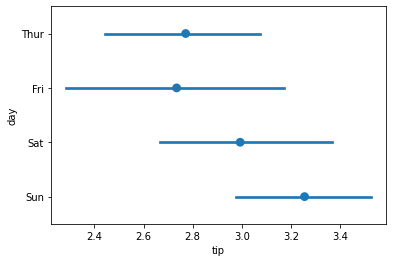

In [20]:
# 각 점을 연결하는 선을 그리지 않는다.
ax = sns.pointplot(x="tip", y="day", data=tips, join=False, order=['Thur','Fri','Sat','Sun'])

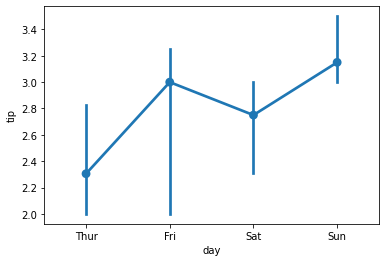

In [21]:
# 평균 대신에 median을 중심위치 측도로 표시함
from numpy import median
ax = sns.pointplot(x="day", y="tip", data=tips, estimator=median, order=['Thur','Fri','Sat','Sun'])

# 막대그래프 실습
1. 타이타닉 데이터 셋을 읽어 들인다.
```
titanic = pd.read_csv('./data/titanic.csv')
titanic.info()
```

2. 선실 등급(Pclass)별 생존율을 막대그래프로 그려 비교하시오.

3. 선실 등급, 성별에 따라서 생존율을 병렬 막대 그래프로 비교하시오.

4. 선실 등급별 남여 성별에 따른 생존율을 point plot으로 시각화하시오.